### CONVOLUTIONAL LAYERS

+ Most Important Building block of CNN is Convolutional Layers.
+ Neurons in the first Convolutional Layer are not connected to every single pixel in the input Image.
+ But only to the Pixel in the Receptive Fields.
+ Each neuron in the Second Convolutional Layer is connected only to neurons located within a small rectangle in the first layer.

> #### *This architecture allows the network to concentrate on small low level features in the Hidden Layer, then assemble them into larger higher level features in the next Hidden layer and so on.*



*ZERO PADDING* : 

To have some height and width as previous layer, it is common to add zeros around the input, which is called Zero Padding.

*STRIDES* : 

It is possible to connect large input layer to a much smaller layer by spacing out the receptive fields.This dramatically reduces the model's complexity. The shift from one receptive field to the next is called Stride.

*FILTERS* :

Neurons weights can be represented as a small image size of the receptive field called filters or Convolutional Kernels.

*FEATURE MAP* :

A layer full of Neurons using the same filters outputs a Feature Maps.


*STACKING MULTIPLE FEATURE MAPS* :

+ Convolutional Layers has multiple filters.
+ And output one feature map per filter.
+ So it is more accurately represented in 3D.
+ One neuron per pixel in each feature map and all neurons within a given feature map share same parameter.
+ ie weights and bias.
+ Neurons in different feature maps uses different parameters.
+ Input images are composed of multiple SubLayer.
    + red, green and blue (RGB color channels)
+ GrayScale images is having one channel. but some image may have much more.

> + Fact that all neurons in the feature map share the same parameters dramatically reduce the number of parameter of the model.
> + When one CNN has learned to recognize a pattern in one location, it can recognize it in any other location.
> + But in DNN, the learned pattern can only recognize it in that particular location.


#### TENSORFLOW IMPLEMENTATION OF CONVOLUTIONAL LAYER

+ Each Input Image is represented as 3D tensor of shape - `[height, width, channels]`
+ Mini-Batch represented as 4D tensor of shape - `[mini batch size, height, width, channels]`
+ Weights of Convolutional Layer is represented as 4D tensor of shape - `[f1, f2, f3, f4]`
+ Bias of Convolutional layer is represented as 1D tensor - `[fn]`
+ Padding: 
    + `same` : convolutional layer uses zero padding.
    + `valid` : convolutional layer does not uses padding.

In [97]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [39]:
## functions to use
## to plot gray image
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
## to plot color image
def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")
    
## to crop the images
def crop(images):
    return images[150:220, 130:250]

## to save the figure which needs to be plotted
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

IMAGE Shape :------------------ (2, 427, 640, 3)
FILTER Shape :----------------- (7, 7, 3, 2)
OUTPUT Shape :----------------- (2, 427, 640, 2)


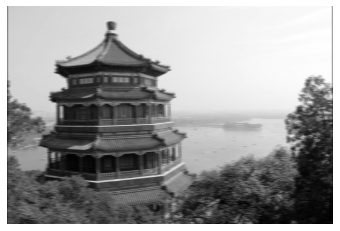

In [32]:
## load the images
# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
print("IMAGE Shape :------------------",images.shape)
batch_size, height, width, channels = images.shape
## Create 2 filters using numpy
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
print("FILTER Shape :-----------------",filters.shape)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line
# print(filters)
## define the convolution layer
## images are 4D tensor
## filters are 4D tensor
## strides used is 1
## padding is same. same means conv layer uses zero padding.
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
print("OUTPUT Shape :-----------------",outputs.shape)
## plot the outputs
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

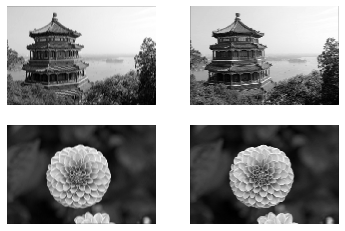

In [34]:
## plotting the images loaded.
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

Saving figure cropped_china_original


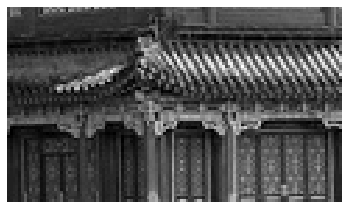

In [111]:
plot_image(crop(images[0, :, :, 0]))
save_fig("cropped_china_original", tight_layout=False)
plt.show()

Saving figure cropped_china_vertical


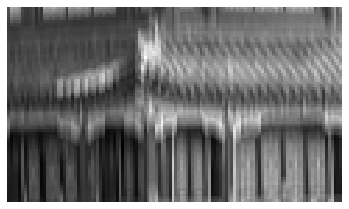

Saving figure cropped_china_horizontal


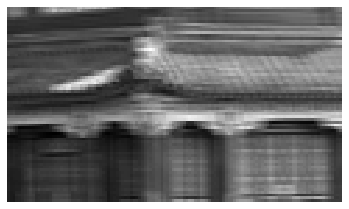

In [112]:
for feature_map_index, filename in enumerate(["cropped_china_vertical", "cropped_china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    save_fig(filename, tight_layout=False)
    plt.show()

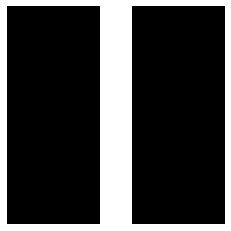

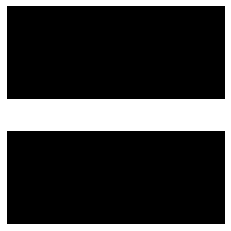

In [113]:
## plot the filters
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

Saving figure cropped_flower_original


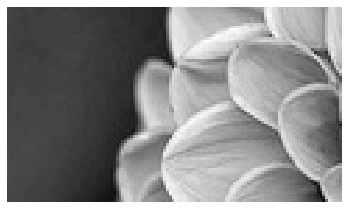

In [116]:
plot_image(crop(images[1, :, :, 1]))
save_fig("cropped_flower_original", tight_layout=False)
plt.show()

Saving figure cropped_flower_vertical


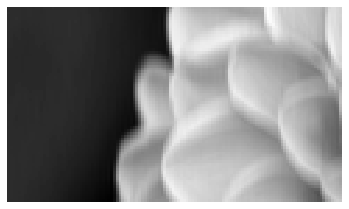

Saving figure cropped_flower_horizontal


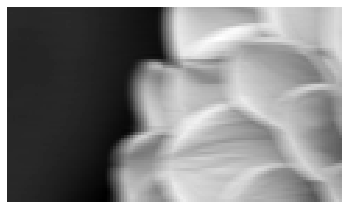

In [117]:
for feature_map_index, filename in enumerate(["cropped_flower_vertical", "cropped_flower_horizontal"]):
    plot_image(crop(outputs[1, :, :, feature_map_index]))
    save_fig(filename, tight_layout=False)
    plt.show()

#### CREATING CONVOLUTIONAL LAYER USING CONV2D

In [75]:
conv = keras.layers.Conv2D(filters=2,            ## filter = 2
                           kernel_size=7,        ## kernel_size = 7
                           strides=1,            ## strides = 1
                           padding="SAME",       ## padding = same
                           activation="relu",    ## activation = "relu" 
                           input_shape=outputs.shape)
print(conv)

## calling this layer
## passing it to two test images
conv_outputs = conv(images)
print("The Dimension of the Output Layer :---------",conv_outputs.shape)

The Dimension of the Output Layer :--------- (2, 427, 640, 2)


+ The output is 4D Tensor.
+ The dimensions are: `[batch size, height, width, channels]`
+ First dimension is 2, bcz there is only two images.
+ Then height and width. `[427,640]`
+ Last thing is 2 : this convolutional layer has 2 filters.
+ there are 2 output feature maps per input image

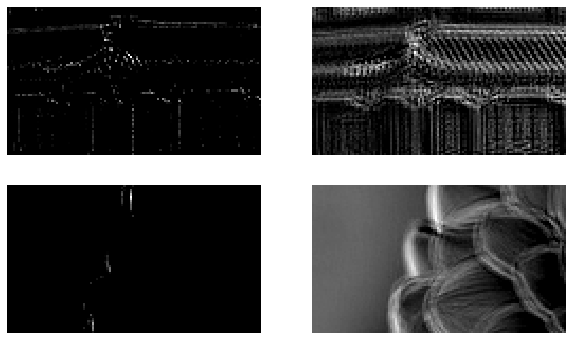

In [60]:
## look at the two output feature maps for each images.
## Since the filters are initialized randomly, they'll initially detect random patterns
## this is cropped image
plt.figure(figsize=(10,6))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(crop(conv_outputs[image_index, :, :, feature_map_index]))
plt.show()

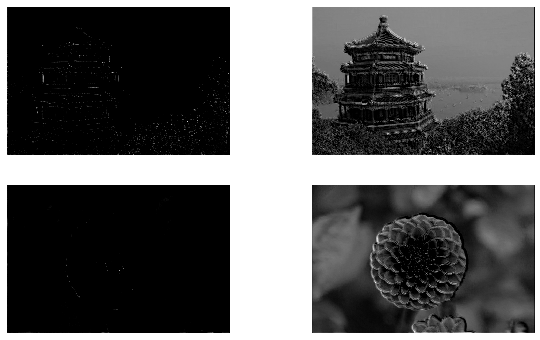

In [61]:
## image that are not cropped
plt.figure(figsize=(10,6))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(conv_outputs[image_index, :, :, feature_map_index])
plt.show()

+ As you can see from the Image.
+ Here the Second Filter is acting as an Edge Detector.
+ Randomly initialized filters often act this way, which is quite fortunate since detecting edges is quite useful in image processing

(2, 427, 640, 2)
===============CROPPED===============


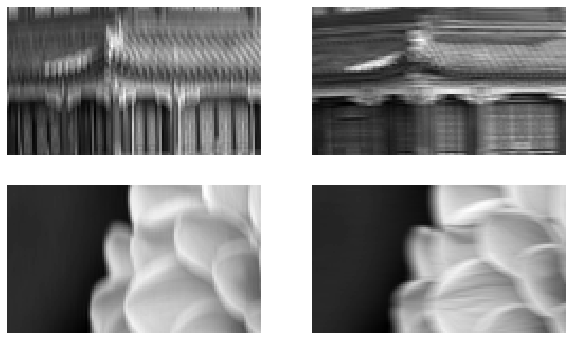

===============NOT CROPPED===============


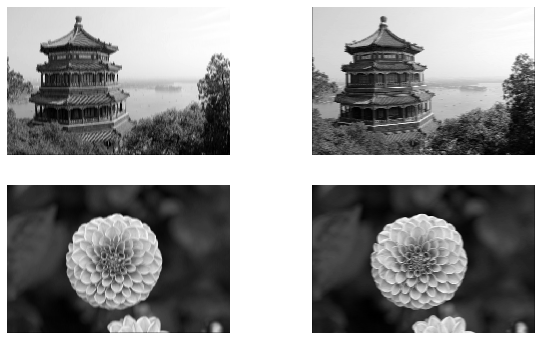

In [74]:
## we can set the filters to be the ones and set the biases to zeros
conv.set_weights([filters, np.zeros(2)])
## now check the output
conv_outputs = conv(images)
print(conv_outputs.shape)
## then plotting the outputs in cropped and not croped
print("===============CROPPED===============")
plt.figure(figsize=(10,6))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(crop(conv_outputs[image_index, :, :, feature_map_index]))
plt.show()
## not cropped
print("===============NOT CROPPED===============")
plt.figure(figsize=(10,6))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(conv_outputs[image_index, :, :, feature_map_index])
plt.show()

#### VALID VS SAME PADDING

In [90]:
## defining feature map size
def feature_map_size(input_size, kernel_size, strides=1, padding="SAME"):
    if padding == "SAME":
        return (input_size - 1) // strides + 1
    else:
        return (input_size - kernel_size) // strides + 1
## defining pad before and padded size
def pad_before_and_padded_size(input_size, kernel_size, strides=1):
    fmap_size = feature_map_size(input_size, kernel_size, strides)
    padded_size = max((fmap_size - 1) * strides + kernel_size, input_size)
    pad_before = (padded_size - input_size) // 2
    return pad_before, padded_size
## defining manual same padding
def manual_same_padding(images, kernel_size, strides=1):
    if kernel_size == 1:
        return images.astype(np.float32)
    batch_size, height, width, channels = images.shape
    top_pad, padded_height = pad_before_and_padded_size(height, kernel_size, strides)
    left_pad, padded_width  = pad_before_and_padded_size(width, kernel_size, strides)
    padded_shape = [batch_size, padded_height, padded_width, channels]
    padded_images = np.zeros(padded_shape, dtype=np.float32)
    padded_images[:, top_pad:height+top_pad, left_pad:width+left_pad, :] = images
    return padded_images

kernel_size = 7
strides = 2
## valid padding
conv_valid = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="VALID")
print(conv_valid)
conv_valid_outputs = conv_valid(images)
print(conv_valid_outputs.shape)

## same padding
conv_same = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="SAME")
print(conv_same)
conv_same_outputs = conv_same(images)
print(conv_same_outputs.shape)

print("===============MANUAL TESTING-==================")
## valid output
valid_output = conv_valid(manual_same_padding(images, kernel_size, strides))
print(valid_output.shape)
# Need to call build() so conv_same's weights get created
conv_same.build(tf.TensorShape(images.shape))
# Copy the weights from conv_valid to conv_same
conv_same.set_weights(conv_valid.get_weights())
## same output
same_output = conv_same(images.astype(np.float32))
print(same_output.shape)
assert np.allclose(valid_output.numpy(), same_output.numpy())

(2, 211, 317, 1)
(2, 214, 320, 1)
===============MANUAL TESTING-==================
(2, 214, 320, 1)
(2, 214, 320, 1)


#### POOLING LAYERS

+ Pooling layer is Used to Shrink (Sub Sample)
+ Shrink the input image in order to reduce the
    + computational load.
    + memory usage
    + number of parameters

(2, 35, 60, 3)
Saving figure china_max_pooling


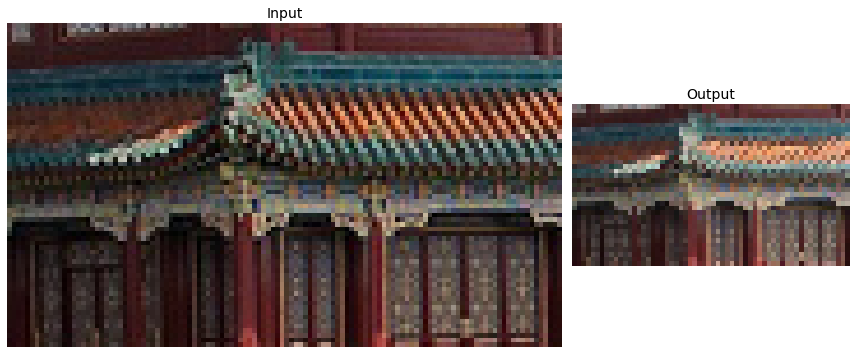

In [109]:
## implementation
max_pool = keras.layers.MaxPool2D(pool_size=2)
## taking max pooling after the cropping the images
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)
print(output.shape)  ## here there are three filters.


## plot the first images
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
save_fig("china_max_pooling")
plt.show()

Saving figure flower_max_pooling


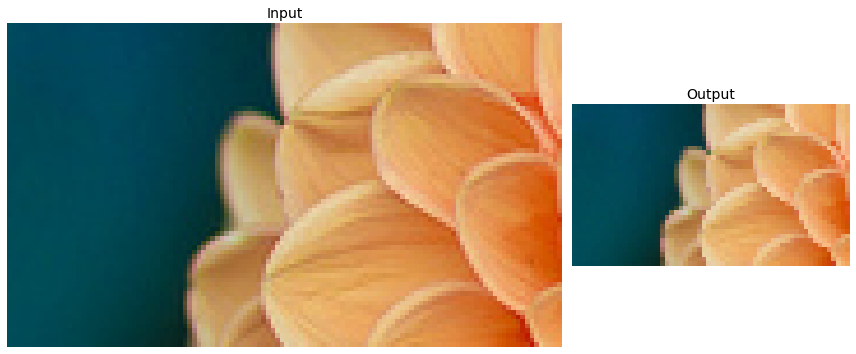

In [110]:
## plot the first images
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[1])  # plot the 2nd image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[1])  # plot the output for the 2nd image
ax2.axis("off")
save_fig("flower_max_pooling")
plt.show()

(2, 70, 120, 1)
(2, 70, 120, 1)


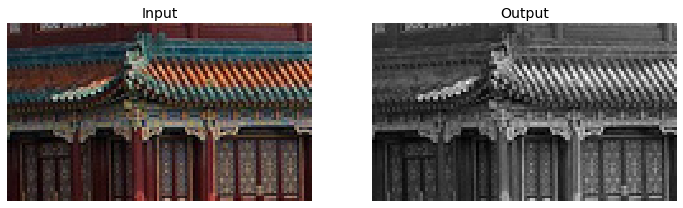

In [105]:
## depthwise pooling
class DepthMaxPool(keras.layers.Layer):
    def __init__(self, pool_size, strides=None, padding="VALID", **kwargs):
        super().__init__(**kwargs)
        if strides is None:
            strides = pool_size
        self.pool_size = pool_size
        self.strides = strides
        self.padding = padding
    def call(self, inputs):
        return tf.nn.max_pool(inputs,
                              ksize=(1, 1, 1, self.pool_size),
                              strides=(1, 1, 1, self.pool_size),
                              padding=self.padding)

    

depth_pool = DepthMaxPool(3)
with tf.device("/cpu:0"): # there is no GPU-kernel yet
    depth_output = depth_pool(cropped_images)
print(depth_output.shape)

## OR

depth_pool = keras.layers.Lambda(lambda X: tf.nn.max_pool(
    X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID"))
with tf.device("/cpu:0"): # there is no GPU-kernel yet
    depth_output = depth_pool(cropped_images)
print(depth_output.shape)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input", fontsize=14)
plot_color_image(cropped_images[0])  # plot the 1st image
plt.subplot(1, 2, 2)
plt.title("Output", fontsize=14)
plot_image(depth_output[0, ..., 0])  # plot the output for the 1st image
plt.axis("off")
plt.show()

#### AVERAGE POOLING

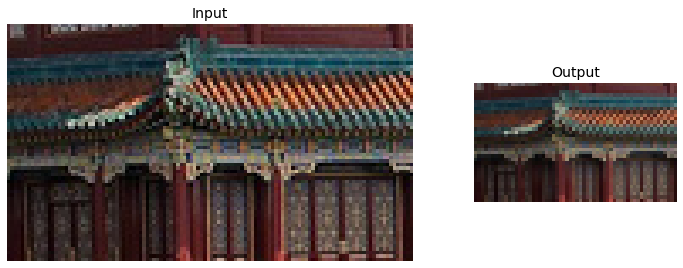

In [118]:
avg_pool = keras.layers.AvgPool2D(pool_size=2)
output_avg = avg_pool(cropped_images)
fig = plt.figure(figsize=(12, 8))

gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output_avg[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

#### GLOBAL AVERAGE POOLING

In [120]:
global_avg_pool = keras.layers.GlobalAvgPool2D()
global_avg_pool(cropped_images)

output_global_avg2 = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))
output_global_avg2(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788801 , 0.22507527, 0.20967631],
       [0.51287866, 0.4595188 , 0.3342377 ]], dtype=float32)>

***